# Data Mining Projec2: Cluster 
- E-mail：niejy20@lzu.edu.cn
- 日期：2025-04-06

# 1. Introduction

## 1.1 Dataset Introduction

本次project使用了三个数据集：Iris 、Breast Cancer Wisconsin 、20 Newsgroups 。分别代表了低维、高维和稀疏数据的典型场景，能够满足多种聚类任务的需求。

### Iris 数据集
- 样本数量：150 个样本
- 特征数量：4 个特征（花萼长度、花萼宽度、花瓣长度、花瓣宽度）
- 类别数量：3 个类别（Setosa、Versicolour、Virginica）
- 特点：常用于聚类算法的验证，例如 K-Means、层次聚类等算法

### MNIST 数据集
- 样本数量：70,000 张图像
- 特征数量：784 个特征（28×28 像素的灰度图像）
- 类别数量：10 个类别（数字 0 到 9）
- 特点：适用于高维聚类任务，尤其是处理特征权重和相关性的场景

### 20 Newsgroups 数据集
- 样本数量：约 18,000 篇新闻组文档
- 特征数量：高维稀疏特征（词频或 TF-IDF 特征）
- 类别数量：20 个类别（不同的新闻主题）
- 特点：适用于高维数据聚类和降维算法（如 t-SNE、PCA）的验证

## 1.2 Introduction to Clustering Algorithms

分类算法可以根据不同的特点和学习方式来进行区分。以下是4种常见的区分方式：

### 1.2.1 Differentiate by data dimension

| 区分依据 | 常见算法 | 特点 |
| --- | --- | --- |
| **低维聚类** | K-Means、层次聚类 | 适合低维数据（如 Iris 数据集），计算效率高，结果易于可视化 |
| **高维聚类** | PCA + K-Means、t-SNE + K-Means | 适合高维数据（如 MNIST 数据集），通常需要降维处理以提高计算效率 |
| **稀疏聚类** | 稀疏 K-Means、LSA（潜在语义分析） | 适合稀疏数据（如 20 Newsgroups 数据集），能够处理高维稀疏特征 |

### 1.2.2 Differentiate by algorithm characteristics

| 区分依据 | 常见算法 | 特点 |
| --- | --- | --- |
| **固定簇数聚类** | K-Means、Gaussian Mixture Model | 需要用户事先指定簇的数量（K 值），计算效率较高，适合已知簇数的场景 |
| **自动确定簇数聚类** | DBSCAN、层次聚类（带剪枝） | 能够自动确定簇的数量，适合未知簇数的场景，但计算复杂度较高 |

### 1.2.3 Differentiate by clustering target

| 区分依据 | 常见算法 | 特点 |
| --- | --- | --- |
| **平面聚类** | K-Means、DBSCAN | 生成一组独立的簇，每个簇是数据的一个子集，适合简单的聚类任务 |
| **层次聚类** | Agglomerative Clustering、Divisive Clustering | 生成簇的层次结构，可以是“自底向上”或“自顶向下”，适合探索数据的层次关系 |

### 1.2.4 Differentiate by data type

| 区分依据 | 常见算法 | 特点 |
| --- | --- | --- |
| **文本聚类** | K-Means（结合 TF-IDF 特征）、层次聚类 | 适合处理文本数据，通常需要特征提取（如词频或 TF-IDF）来处理高维稀疏特征 |
| **图像聚类** | K-Means（结合特征提取）、DBSCAN | 适合处理图像数据，通常需要特征提取（如颜色、纹理等）或降维处理（如 PCA、t-SNE） |
| **时间序列聚类** | K-Means（结合动态时间规整）、层次聚类 | 适合处理时间序列数据，通常需要动态时间规整（DTW）等方法来处理时间序列的动态特性 |
| **空间聚类** | DBSCAN、层次聚类 | 适合处理地理或空间数据，能够处理空间数据的分布特性，常用于犯罪分析、地理信息系统（GIS）等 |

在本次project中，共使用了10种用于聚类任务的算法，分别是：
1. **K-Means**  
2. **DBSCAN**  
3. **层次聚类**  
4. **谱聚类**  
5. **高斯混合模型（GMM）**  
6. **Mean Shift** 
7. **OPTICS**  
8. **BIRCH**  
9. **Affinity Propagation**  
10. **稀疏K-Means**  

## 1.3 运行说明

**为方便批阅时独立运行各个cell的代码，大部分cell未进行封装**（如import导入库、定义评估模型、归一化这些操作）。

# 2. Implementation

In [77]:
# --------------------------
# 导入可复用的库，定义评估函数
# --------------------------

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_openml, fetch_20newsgroups
import matplotlib.pyplot as plt

def evaluate_clustering(data, labels):
    """评估聚类效果"""
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        print("聚类结果中类别数不足，无法计算评估指标")
        return None, None
    
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    print(f"聚类类别数: {len(unique_labels)}")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Calinski-Harabasz Index: {calinski:.4f}")
    return silhouette, calinski

def visualize_clustering(data, labels, title):
    """可视化聚类结果"""
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar()
    plt.show()

## 2.1 K-Means

In [78]:
from sklearn.cluster import KMeans

def kmeans_clustering(data, n_clusters=3):
    """封装的K-means聚类函数"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels, kmeans.cluster_centers_

### 2.1.1 K-Means + Iris


===== Iris 数据集 =====
聚类评估结果:
聚类类别数: 3
Silhouette Score: 0.4799
Calinski-Harabasz Index: 157.3602


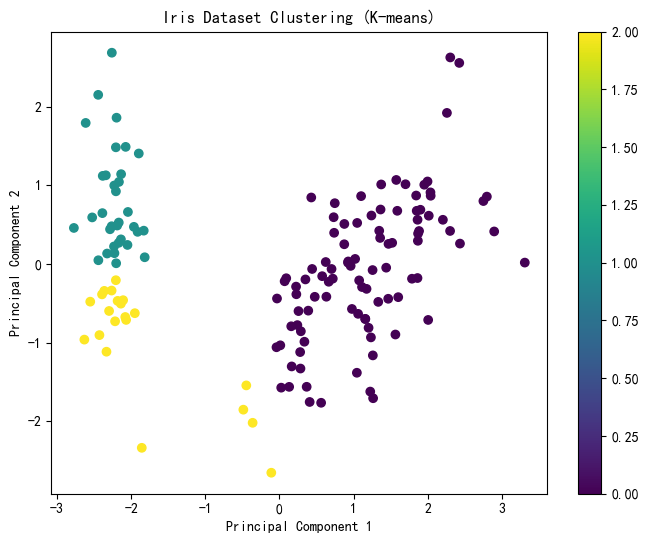

In [79]:
# --------------------------
# 对 Iris 数据集进行聚类
# --------------------------
def cluster_iris():
    print("\n===== Iris 数据集 =====")
    # 加载数据
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X)
    
    # 聚类
    labels, _ = kmeans_clustering(X_scaled, n_clusters=3)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_scaled, labels)
    
    # 可视化
    visualize_clustering(X_scaled, labels, "Iris Dataset Clustering (K-means)")

# 执行聚类
if __name__ == "__main__":
    cluster_iris()

### 2.1.2 K-Means + MNIST


===== MNIST 数据集 =====
聚类评估结果:
聚类类别数: 10
Silhouette Score: 0.0739
Calinski-Harabasz Index: 214.4384


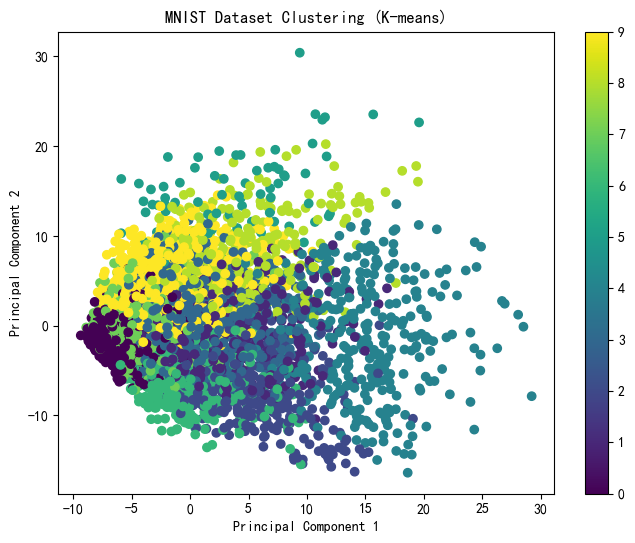

In [80]:
# --------------------------
# 对 MNIST 数据集进行聚类
# --------------------------
def cluster_mnist():
    print("\n===== MNIST 数据集 =====")
    # 加载数据
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    
    # 采样（因为MNIST数据集很大）
    np.random.seed(42)
    sample_indices = np.random.choice(len(X), size=5000, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X_sample)
    
    # 降维（加速聚类）
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_scaled)
    
    # 聚类
    labels, _ = kmeans_clustering(X_pca, n_clusters=10)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_pca, labels)
    
    # 可视化
    visualize_clustering(X_pca, labels, "MNIST Dataset Clustering (K-means)")

# 执行聚类
if __name__ == "__main__":
    cluster_mnist()

### 2.1.3 K-Means + 20 Newsgroups


===== 20 Newsgroups 数据集 =====
聚类评估结果:
聚类类别数: 5
Silhouette Score: 0.0671
Calinski-Harabasz Index: 232.3825


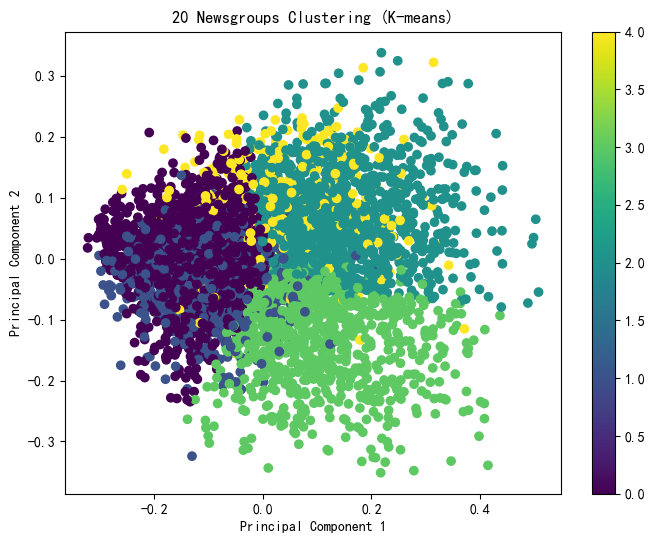

In [81]:
# --------------------------
# 对 20 Newsgroups 数据集进行聚类
# --------------------------
def cluster_20newsgroups():
    print("\n===== 20 Newsgroups 数据集 =====")
    # 加载数据
    categories = ['alt.atheism', 'sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.guns']
    newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
    X = newsgroups.data
    y = newsgroups.target
    
    # 特征提取
    vectorizer = TfidfVectorizer(max_features=2000)
    X_vectorized = vectorizer.fit_transform(X)
    
    # 降维（加速聚类）
    svd = TruncatedSVD(n_components=50)
    X_reduced = svd.fit_transform(X_vectorized)
    
    # 聚类
    labels, _ = kmeans_clustering(X_reduced, n_clusters=5)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_reduced, labels)
    
    # 可视化
    visualize_clustering(X_reduced, labels, "20 Newsgroups Clustering (K-means)")

# 执行聚类
if __name__ == "__main__":
    cluster_20newsgroups()

## 2.2 DBSCAN

In [74]:
def dbscan_clustering(data, eps=0.5, min_samples=5):
    """封装的DBSCAN聚类函数"""
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels

### 2.2.1 DBSCAN + Iris


===== Iris 数据集 =====
聚类评估结果:
Silhouette Score: 0.3565
Calinski-Harabasz Index: 84.5103


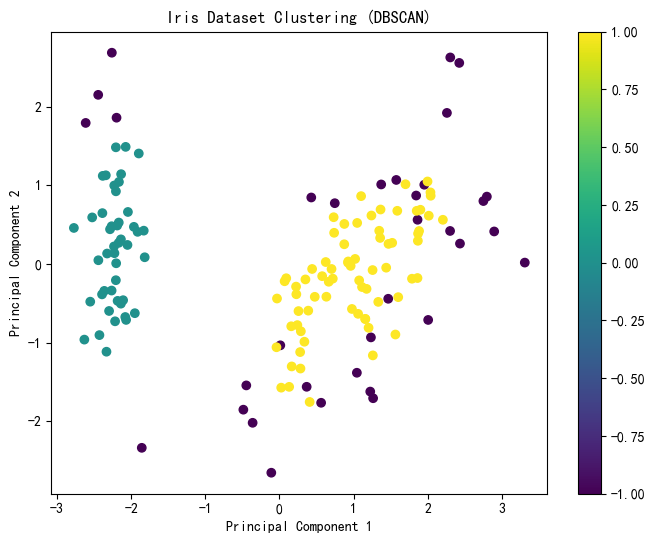

In [75]:
# --------------------------
# 对 Iris 数据集进行聚类
# --------------------------
def cluster_iris():
    print("\n===== Iris 数据集 =====")
    # 加载数据
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X)
    
    # 聚类
    labels = dbscan_clustering(X_scaled, eps=0.5, min_samples=5)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_scaled, labels)
    
    # 可视化
    visualize_clustering(X_scaled, labels, "Iris Dataset Clustering (DBSCAN)")

# 执行聚类
if __name__ == "__main__":
    cluster_iris()

### 2.2.2 DBSCAN + 20 Newsgroups


===== 20 Newsgroups 数据集 =====
聚类评估结果:
Silhouette Score: 0.3036
Calinski-Harabasz Index: 3.6278


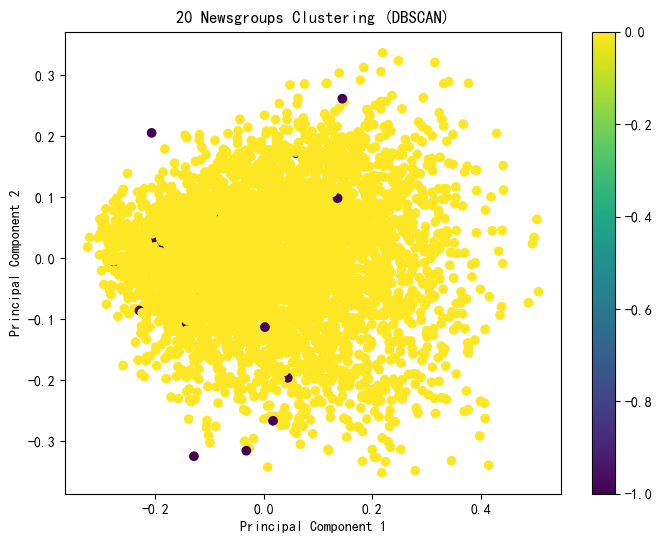

In [29]:
# --------------------------
# 对 20 Newsgroups 数据集进行聚类
# --------------------------
def cluster_20newsgroups():
    print("\n===== 20 Newsgroups 数据集 =====")
    # 加载数据
    categories = ['alt.atheism', 'sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.guns']
    newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
    X = newsgroups.data
    y = newsgroups.target
    
    # 特征提取
    vectorizer = TfidfVectorizer(max_features=2000)
    X_vectorized = vectorizer.fit_transform(X)
    
    # 降维（加速聚类）
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=50)
    X_reduced = svd.fit_transform(X_vectorized)
    
    # 聚类
    labels = dbscan_clustering(X_reduced, eps=0.5, min_samples=5)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_reduced, labels)
    
    # 可视化
    visualize_clustering(X_reduced, labels, "20 Newsgroups Clustering (DBSCAN)")

# 执行聚类
if __name__ == "__main__":
    cluster_20newsgroups()

## 2.3 层次聚类

In [82]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

def hierarchical_clustering(data, n_clusters=3):
    """封装的层次聚类函数"""
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(data)
    return labels

### 2.3.1 层次聚类 + Iris


===== Iris 数据集 =====
层次聚类评估结果:
Silhouette Score: 0.4467
Calinski-Harabasz Index: 222.7192


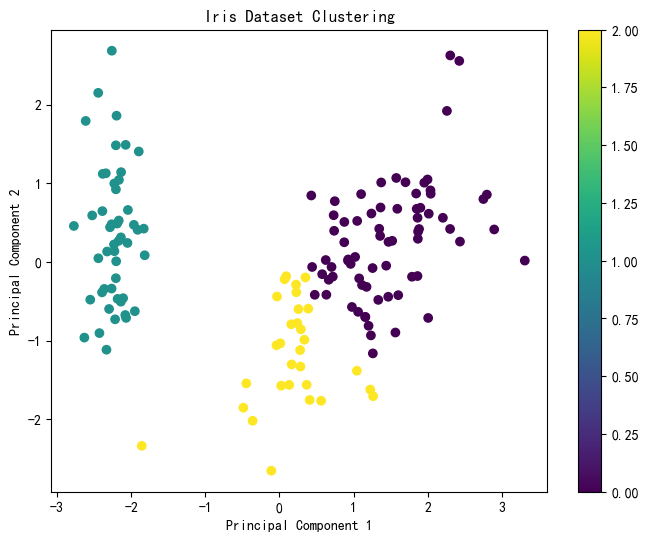

In [72]:
def cluster_iris():
    print("\n===== Iris 数据集 =====")
    # 加载数据
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X)
    
    # 聚类
    labels = hierarchical_clustering(X_scaled, n_clusters=3)
    
    # 评估
    print("层次聚类评估结果:")
    evaluate_clustering(X_scaled, labels)
    
    # 可视化
    visualize_clustering(X_scaled, labels, "Iris Dataset Clustering")

# 执行聚类
if __name__ == "__main__":
    cluster_iris()

### 2.3.2 层次聚类 + MNIST


===== MNIST 数据集 =====
层次聚类评估结果:
Silhouette Score: 0.0266
Calinski-Harabasz Index: 171.5838


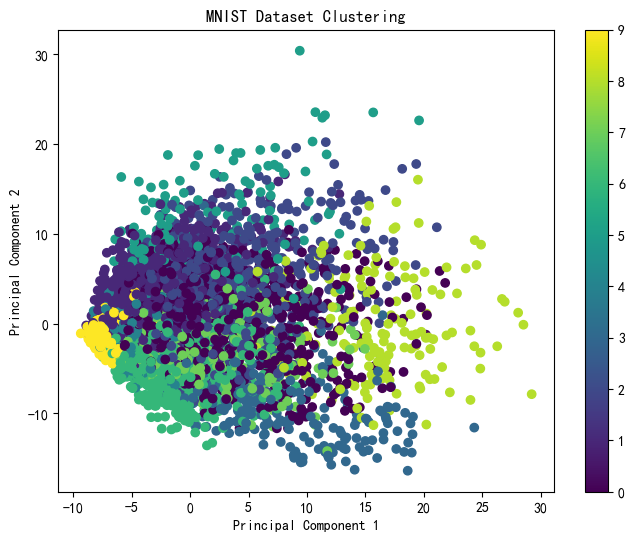

In [25]:
# --------------------------
# 对 MNIST 数据集进行聚类
# --------------------------
def cluster_mnist():
    print("\n===== MNIST 数据集 =====")
    # 加载数据
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    
    # 采样（因为MNIST数据集很大）
    np.random.seed(42)
    sample_indices = np.random.choice(len(X), size=5000, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X_sample)
    
    # 降维（加速聚类）
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_scaled)
    
    # 聚类
    labels = hierarchical_clustering(X_pca, n_clusters=10)
    
    # 评估
    print("层次聚类评估结果:")
    evaluate_clustering(X_pca, labels)
    
    # 可视化
    visualize_clustering(X_pca, labels, "MNIST Dataset Clustering")

# 执行聚类
if __name__ == "__main__":
    cluster_mnist()

### 2.3.3 层次聚类 + 20 Newsgroups


===== 20 Newsgroups 数据集 =====
层次聚类评估结果:
Silhouette Score: 0.0305
Calinski-Harabasz Index: 150.4985


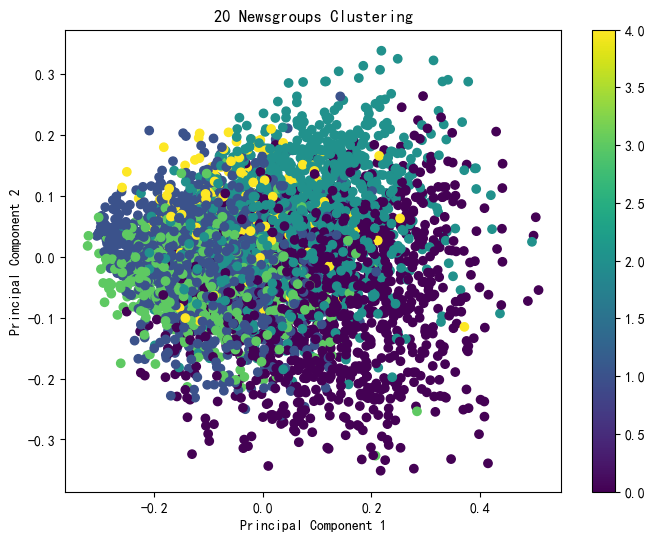

In [26]:
# --------------------------
# 对 20 Newsgroups 数据集进行聚类
# --------------------------
def cluster_20newsgroups():
    print("\n===== 20 Newsgroups 数据集 =====")
    # 加载数据
    categories = ['alt.atheism', 'sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.guns']
    newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
    X = newsgroups.data
    y = newsgroups.target
    
    # 特征提取
    vectorizer = TfidfVectorizer(max_features=2000)
    X_vectorized = vectorizer.fit_transform(X)
    
    # 降维（加速聚类）
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=50)
    X_reduced = svd.fit_transform(X_vectorized)
    
    # 聚类
    labels = hierarchical_clustering(X_reduced, n_clusters=5)
    
    # 评估
    print("层次聚类评估结果:")
    evaluate_clustering(X_reduced, labels)
    
    # 可视化
    visualize_clustering(X_reduced, labels, "20 Newsgroups Clustering")

# 执行聚类
if __name__ == "__main__":
    cluster_20newsgroups()

## 2.4 谱聚类

In [73]:
from sklearn.cluster import SpectralClustering

def spectral_clustering(data, n_clusters=3, affinity='nearest_neighbors'):
    """封装的谱聚类函数"""
    spectral = SpectralClustering(n_clusters=n_clusters, affinity=affinity)
    labels = spectral.fit_predict(data)
    return labels

### 2.4.1 谱聚类 + Iris


===== Iris 数据集 =====
聚类评估结果:
Silhouette Score: 0.4593
Calinski-Harabasz Index: 229.6799


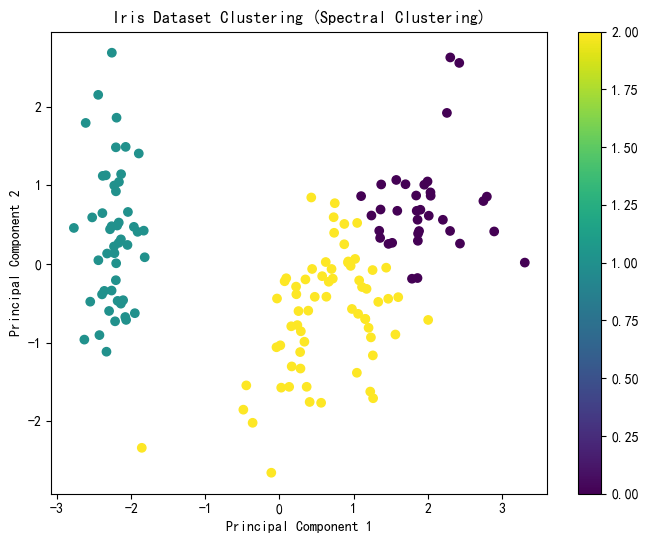

In [33]:
# --------------------------
# 对 Iris 数据集进行聚类
# --------------------------
def cluster_iris():
    print("\n===== Iris 数据集 =====")
    # 加载数据
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X)
    
    # 聚类
    labels = spectral_clustering(X_scaled, n_clusters=3, affinity='nearest_neighbors')
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_scaled, labels)
    
    # 可视化
    visualize_clustering(X_scaled, labels, "Iris Dataset Clustering (Spectral Clustering)")

# 执行聚类
if __name__ == "__main__":
    cluster_iris()

### 2.4.2 谱聚类 + MNSIT


===== MNIST 数据集 =====
聚类评估结果:
Silhouette Score: 0.0084
Calinski-Harabasz Index: 169.3512


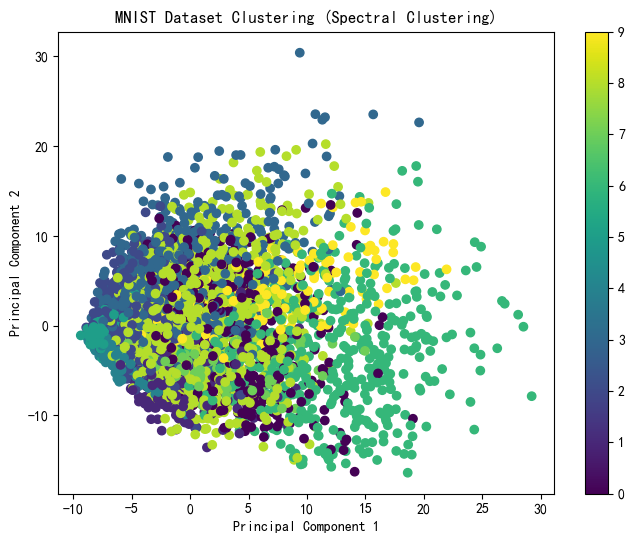

In [31]:
# --------------------------
# 对 MNIST 数据集进行聚类
# --------------------------
def cluster_mnist():
    print("\n===== MNIST 数据集 =====")
    # 加载数据
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    
    # 采样（因为MNIST数据集很大）
    np.random.seed(42)
    sample_indices = np.random.choice(len(X), size=5000, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X_sample)
    
    # 降维（加速聚类）
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_scaled)
    
    # 聚类
    labels = spectral_clustering(X_pca, n_clusters=10, affinity='nearest_neighbors')
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_pca, labels)
    
    # 可视化
    visualize_clustering(X_pca, labels, "MNIST Dataset Clustering (Spectral Clustering)")

# 执行聚类
if __name__ == "__main__":
    cluster_mnist()

### 2.4.3 谱聚类 + 20 Newsgroups


===== 20 Newsgroups 数据集 =====
聚类评估结果:
Silhouette Score: 0.0597
Calinski-Harabasz Index: 222.1579


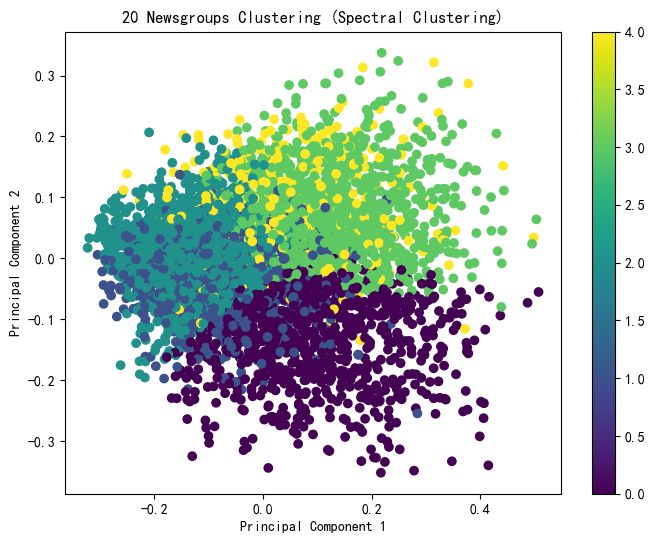

In [32]:
# --------------------------
# 对 20 Newsgroups 数据集进行聚类
# --------------------------
def cluster_20newsgroups():
    print("\n===== 20 Newsgroups 数据集 =====")
    # 加载数据
    categories = ['alt.atheism', 'sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.guns']
    newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
    X = newsgroups.data
    y = newsgroups.target
    
    # 特征提取
    vectorizer = TfidfVectorizer(max_features=2000)
    X_vectorized = vectorizer.fit_transform(X)
    
    # 降维（加速聚类）
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=50)
    X_reduced = svd.fit_transform(X_vectorized)
    
    # 聚类
    labels = spectral_clustering(X_reduced, n_clusters=5, affinity='rbf')
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_reduced, labels)
    
    # 可视化
    visualize_clustering(X_reduced, labels, "20 Newsgroups Clustering (Spectral Clustering)")

# 执行聚类
if __name__ == "__main__":
    cluster_20newsgroups()

## 2.5 Gaussian Mixture Model (GMM)

In [36]:
from sklearn.mixture import GaussianMixture

def gmm_clustering(data, n_clusters=3, covariance_type='full'):
    """封装的高斯混合模型聚类函数"""
    gmm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

### 2.5.1 Gaussian Mixture Model + Iris


===== Iris 数据集 =====
聚类评估结果:
Silhouette Score: 0.4751
Calinski-Harabasz Index: 141.2315


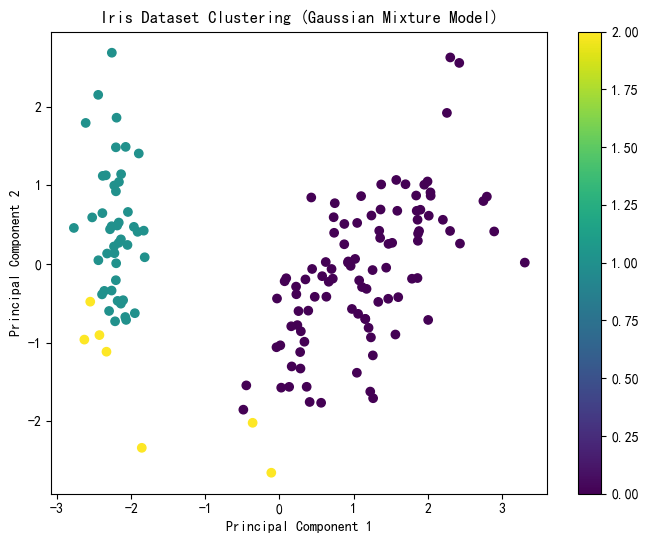

In [37]:
# --------------------------
# 对 Iris 数据集进行聚类
# --------------------------
def cluster_iris():
    print("\n===== Iris 数据集 =====")
    # 加载数据
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X)
    
    # 聚类
    labels = gmm_clustering(X_scaled, n_clusters=3, covariance_type='full')
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_scaled, labels)
    
    # 可视化
    visualize_clustering(X_scaled, labels, "Iris Dataset Clustering (Gaussian Mixture Model)")

# 执行聚类
if __name__ == "__main__":
    cluster_iris()

### 2.5.2 Gaussian Mixture Model + MNIST


===== MNIST 数据集 =====
聚类评估结果:
Silhouette Score: 0.0133
Calinski-Harabasz Index: 159.9626


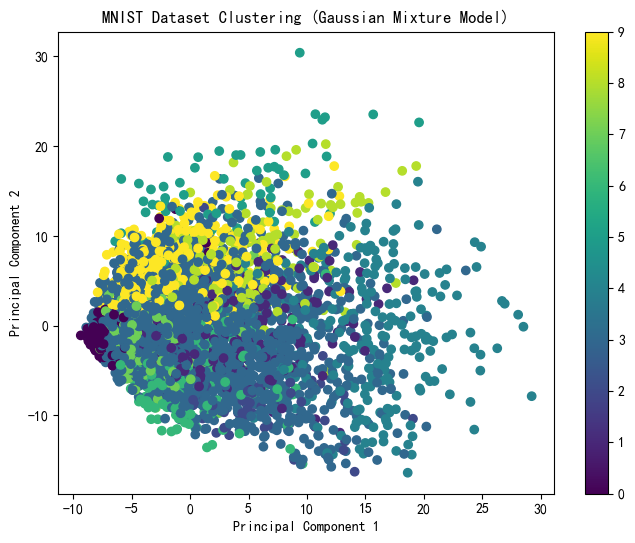

In [38]:
# --------------------------
# 对 MNIST 数据集进行聚类
# --------------------------
def cluster_mnist():
    print("\n===== MNIST 数据集 =====")
    # 加载数据
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    
    # 采样（因为MNIST数据集很大）
    np.random.seed(42)
    sample_indices = np.random.choice(len(X), size=5000, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X_sample)
    
    # 降维（加速聚类）
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_scaled)
    
    # 聚类
    labels = gmm_clustering(X_pca, n_clusters=10, covariance_type='tied')
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_pca, labels)
    
    # 可视化
    visualize_clustering(X_pca, labels, "MNIST Dataset Clustering (Gaussian Mixture Model)")

# 执行聚类
if __name__ == "__main__":
    cluster_mnist()

### 2.5.3 Gaussian Mixture Model + 20 Newsgroups


===== 20 Newsgroups 数据集 =====
聚类评估结果:
Silhouette Score: -0.0731
Calinski-Harabasz Index: 121.2244


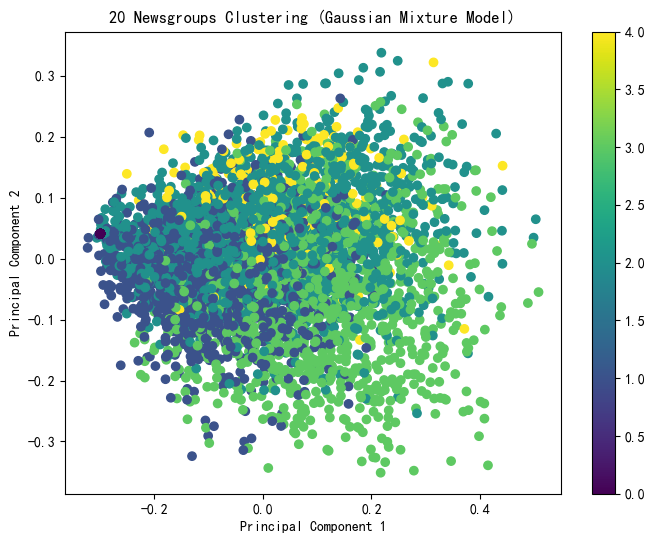

In [39]:
# --------------------------
# 对 20 Newsgroups 数据集进行聚类
# --------------------------
def cluster_20newsgroups():
    print("\n===== 20 Newsgroups 数据集 =====")
    # 加载数据
    categories = ['alt.atheism', 'sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.guns']
    newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
    X = newsgroups.data
    y = newsgroups.target
    
    # 特征提取
    vectorizer = TfidfVectorizer(max_features=2000)
    X_vectorized = vectorizer.fit_transform(X)
    
    # 降维（加速聚类）
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=50)
    X_reduced = svd.fit_transform(X_vectorized)
    
    # 聚类
    labels = gmm_clustering(X_reduced, n_clusters=5, covariance_type='diag')
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_reduced, labels)
    
    # 可视化
    visualize_clustering(X_reduced, labels, "20 Newsgroups Clustering (Gaussian Mixture Model)")

# 执行聚类
if __name__ == "__main__":
    cluster_20newsgroups()

## 2.6 Mean Shift

In [42]:
from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift_clustering(data, bandwidth=None):
    """封装的Mean Shift聚类函数"""
    if bandwidth is None:
        bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=500)
    
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    labels = mean_shift.fit_predict(data)
    return labels, mean_shift.cluster_centers_

### 2.6.1 Mean Shift + Iris


===== Iris 数据集 =====
聚类评估结果:
Silhouette Score: 0.4325
Calinski-Harabasz Index: 163.7138


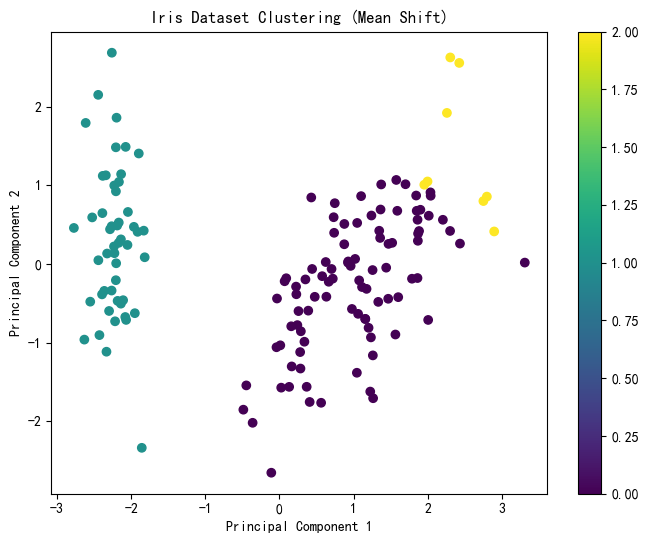

In [43]:
# --------------------------
# 对 Iris 数据集进行聚类
# --------------------------
def cluster_iris():
    print("\n===== Iris 数据集 =====")
    # 加载数据
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X)
    
    # 聚类
    labels, _ = mean_shift_clustering(X_scaled)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_scaled, labels)
    
    # 可视化
    visualize_clustering(X_scaled, labels, "Iris Dataset Clustering (Mean Shift)")

# 执行聚类
if __name__ == "__main__":
    cluster_iris()

### 2.6.2 Mean Shift + MNIST


===== MNIST 数据集 =====
聚类评估结果:
聚类类别数: 4999
Silhouette Score: 0.0002
Calinski-Harabasz Index: 1058.5194


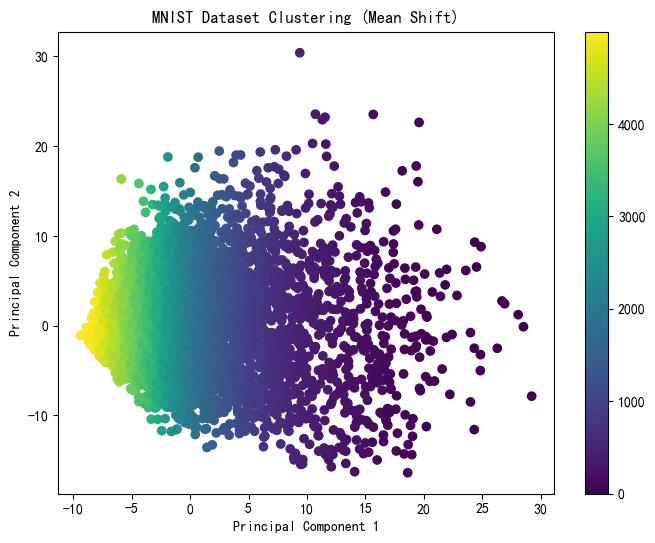

In [88]:
# --------------------------
# 对 MNIST 数据集进行聚类
# --------------------------
def cluster_mnist():
    print("\n===== MNIST 数据集 =====")
    # 加载数据
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    
    # 采样（因为MNIST数据集很大）
    np.random.seed(42)
    sample_indices = np.random.choice(len(X), size=5000, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X_sample)
    
    # 降维（加速聚类）
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_scaled)
    
    # 聚类
    labels, _ = mean_shift_clustering(X_pca, bandwidth=1.0)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_pca, labels)
    
    # 可视化
    visualize_clustering(X_pca, labels, "MNIST Dataset Clustering (Mean Shift)")

# 执行聚类
if __name__ == "__main__":
    cluster_mnist()

## 2.7 OPTICS

In [89]:
from sklearn.cluster import OPTICS

def optics_clustering(data, min_samples=5, xi=0.05):
    """封装的OPTICS聚类函数"""
    optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=0.01)
    labels = optics.fit_predict(data)
    return labels

### 2.7.1 optics + Iris


===== Iris 数据集 =====
聚类评估结果:
Silhouette Score: -0.3676
Calinski-Harabasz Index: 4.1373


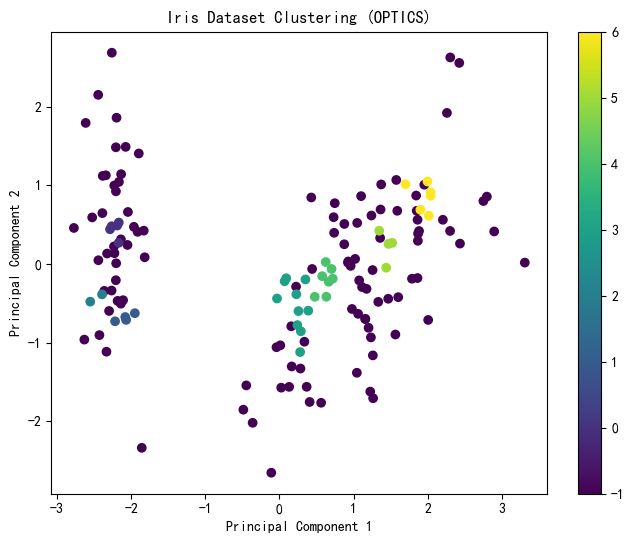

In [50]:
# --------------------------
# 对 Iris 数据集进行聚类
# --------------------------
def cluster_iris():
    print("\n===== Iris 数据集 =====")
    # 加载数据
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X)
    
    # 聚类
    labels = optics_clustering(X_scaled, min_samples=5, xi=0.05)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_scaled, labels)
    
    # 可视化
    visualize_clustering(X_scaled, labels, "Iris Dataset Clustering (OPTICS)")

# 执行聚类
if __name__ == "__main__":
    cluster_iris()

### 2.7.2 optics + 20newsgroups


===== 20 Newsgroups 数据集 =====
聚类评估结果:
聚类类别数: 2
Silhouette Score: -0.2200
Calinski-Harabasz Index: 15.8740


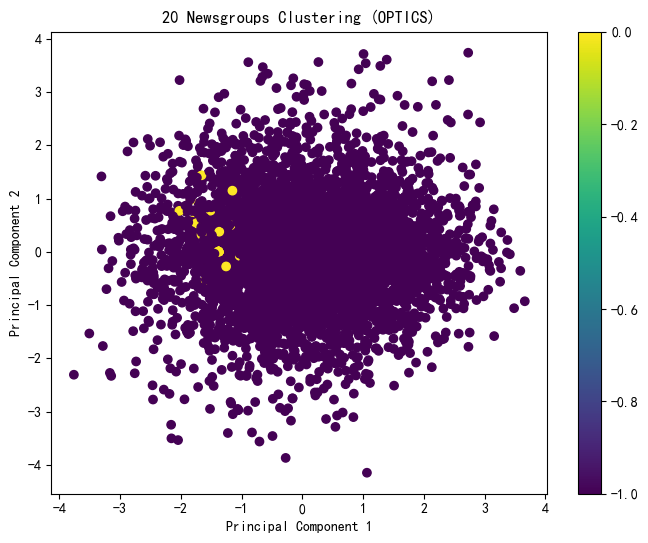

In [93]:
# --------------------------
# 对 20 Newsgroups 数据集进行聚类
# --------------------------
from sklearn.cluster import OPTICS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import numpy as np

def cluster_20newsgroups():
    print("\n===== 20 Newsgroups 数据集 =====")
    # 加载数据
    categories = ['alt.atheism', 'sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.guns']
    newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
    X = newsgroups.data
    y = newsgroups.target

    # 特征提取
    vectorizer = TfidfVectorizer(max_features=2000)
    X_vectorized = vectorizer.fit_transform(X)

    # 降维（加速聚类）
    svd = TruncatedSVD(n_components=50)
    X_reduced = svd.fit_transform(X_vectorized)

    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X_reduced)

    # 聚类
    min_samples = 10
    xi = 0.05
    min_cluster_size = 0.01
    optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
    labels = optics.fit_predict(X_scaled)

    # 检查聚类结果
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        print("聚类结果中类别数不足，无法计算评估指标")
        return

    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_scaled, labels)

    # 可视化
    visualize_clustering(X_scaled, labels, "20 Newsgroups Clustering (OPTICS)")

if __name__ == "__main__":
    cluster_20newsgroups()

## 2.8 Birch

In [53]:
from sklearn.cluster import Birch

def birch_clustering(data, n_clusters=3, threshold=0.5, branching_factor=50):
    """封装的BIRCH聚类函数"""
    birch = Birch(n_clusters=n_clusters, threshold=threshold, branching_factor=branching_factor)
    labels = birch.fit_predict(data)
    return labels

### 2.8.1 Birch + Iris


===== Iris 数据集 =====
聚类评估结果:
Silhouette Score: 0.4536
Calinski-Harabasz Index: 219.8188


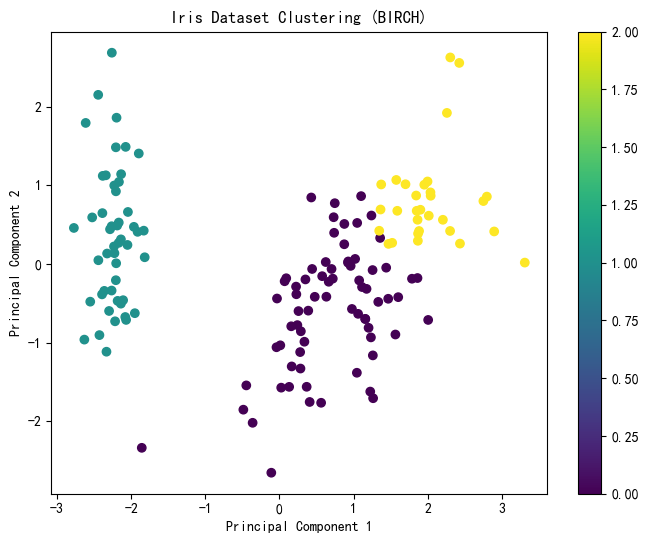

In [54]:
# --------------------------
# 对 Iris 数据集进行聚类
# --------------------------
def cluster_iris():
    print("\n===== Iris 数据集 =====")
    # 加载数据
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X)
    
    # 聚类
    labels = birch_clustering(X_scaled, n_clusters=3, threshold=0.5, branching_factor=50)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_scaled, labels)
    
    # 可视化
    visualize_clustering(X_scaled, labels, "Iris Dataset Clustering (BIRCH)")

# 执行聚类
if __name__ == "__main__":
    cluster_iris()

### 2.8.2 Birch + MNIST


===== MNIST 数据集 =====
聚类评估结果:
Silhouette Score: 0.0265
Calinski-Harabasz Index: 171.5243


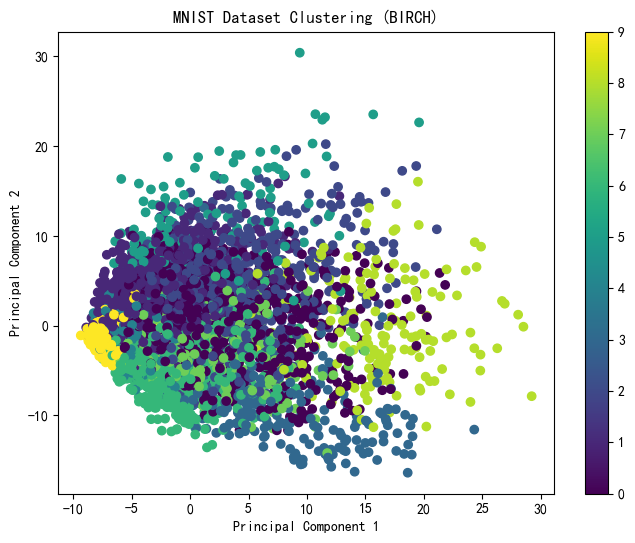

In [55]:
# --------------------------
# 对 MNIST 数据集进行聚类
# --------------------------
def cluster_mnist():
    print("\n===== MNIST 数据集 =====")
    # 加载数据
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    
    # 采样（因为MNIST数据集很大）
    np.random.seed(42)
    sample_indices = np.random.choice(len(X), size=5000, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X_sample)
    
    # 降维（加速聚类）
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_scaled)
    
    # 聚类
    labels = birch_clustering(X_pca, n_clusters=10, threshold=0.5, branching_factor=50)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_pca, labels)
    
    # 可视化
    visualize_clustering(X_pca, labels, "MNIST Dataset Clustering (BIRCH)")

# 执行聚类
if __name__ == "__main__":
    cluster_mnist()

## 2.9 Affinity Propagation

In [57]:
from sklearn.cluster import AffinityPropagation

def affinity_propagation_clustering(data, damping=0.5, preference=None):
    """封装的Affinity Propagation聚类函数"""
    affinity = AffinityPropagation(damping=damping, preference=preference)
    labels = affinity.fit_predict(data)
    return labels, affinity.cluster_centers_indices_

### 2.9.1 Affinity Propagation  + Iris


===== Iris 数据集 =====
聚类评估结果:
Silhouette Score: 0.4578
Calinski-Harabasz Index: 241.4178


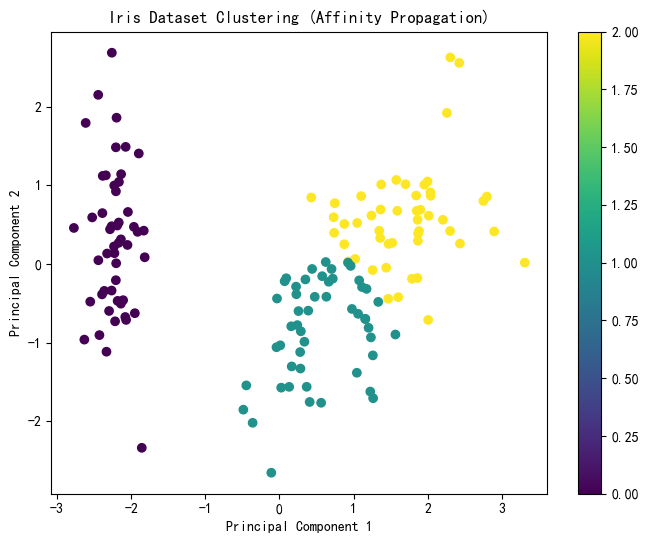

In [58]:
# --------------------------
# 对 Iris 数据集进行聚类
# --------------------------
def cluster_iris():
    print("\n===== Iris 数据集 =====")
    # 加载数据
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X)
    
    # 聚类
    labels, _ = affinity_propagation_clustering(X_scaled, damping=0.5, preference=-50)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_scaled, labels)
    
    # 可视化
    visualize_clustering(X_scaled, labels, "Iris Dataset Clustering (Affinity Propagation)")

# 执行聚类
if __name__ == "__main__":
    cluster_iris()

### 2.9.2 Affinity Propagation  + MNIST


===== MNIST 数据集 =====
聚类评估结果:
Silhouette Score: 0.0790
Calinski-Harabasz Index: 22.5281


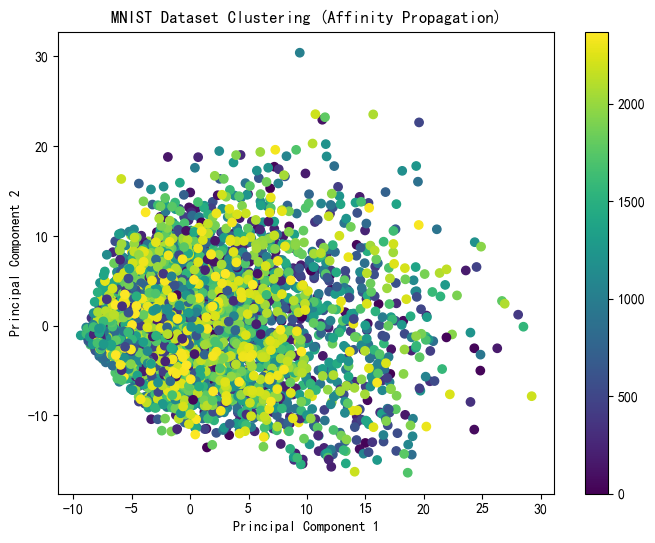

In [59]:
# --------------------------
# 对 MNIST 数据集进行聚类
# --------------------------
def cluster_mnist():
    print("\n===== MNIST 数据集 =====")
    # 加载数据
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    
    # 采样（因为MNIST数据集很大）
    np.random.seed(42)
    sample_indices = np.random.choice(len(X), size=5000, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X_sample)
    
    # 降维（加速聚类）
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_scaled)
    
    # 聚类
    labels, _ = affinity_propagation_clustering(X_pca, damping=0.5, preference=-100)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_pca, labels)
    
    # 可视化
    visualize_clustering(X_pca, labels, "MNIST Dataset Clustering (Affinity Propagation)")

# 执行聚类
if __name__ == "__main__":
    cluster_mnist()

## 2.10 稀疏 K-Means

In [69]:
from sklearn.decomposition import TruncatedSVD

def sparse_kmeans_clustering(data, n_clusters=3, sparsity=0.5):
    """封装的稀疏K-means聚类函数"""
    # 创建稀疏K-means模型
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # 对数据进行稀疏化处理
    sparse_data = data.copy()
    # 随机将部分特征值设为零，模拟稀疏性
    np.random.seed(42)
    mask = np.random.rand(*sparse_data.shape) > sparsity
    sparse_data[mask] = 0
    # 聚类
    labels = kmeans.fit_predict(sparse_data)
    return labels

### 2.10.1 sparse kmeans  + Iris


===== Iris 数据集 =====
聚类评估结果:
Silhouette Score: -0.0438
Calinski-Harabasz Index: 18.6502


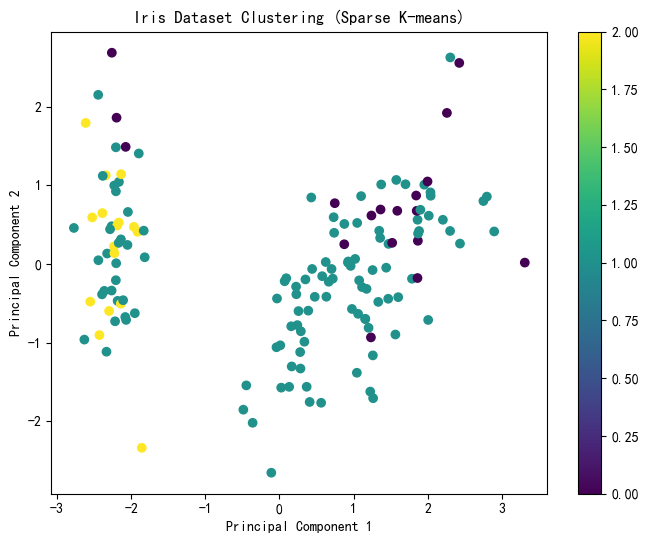

In [66]:
# --------------------------
# 对 Iris 数据集进行聚类
# --------------------------
def cluster_iris():
    print("\n===== Iris 数据集 =====")
    # 加载数据
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X)
    
    # 聚类
    labels = sparse_kmeans_clustering(X_scaled, n_clusters=3, sparsity=0.3)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_scaled, labels)
    
    # 可视化
    visualize_clustering(X_scaled, labels, "Iris Dataset Clustering (Sparse K-means)")

# 执行聚类
if __name__ == "__main__":
    cluster_iris()

### 2.10.2 sparse kmeans  + MNIST


===== MNIST 数据集 =====
聚类评估结果:
Silhouette Score: -0.0505
Calinski-Harabasz Index: 82.1427


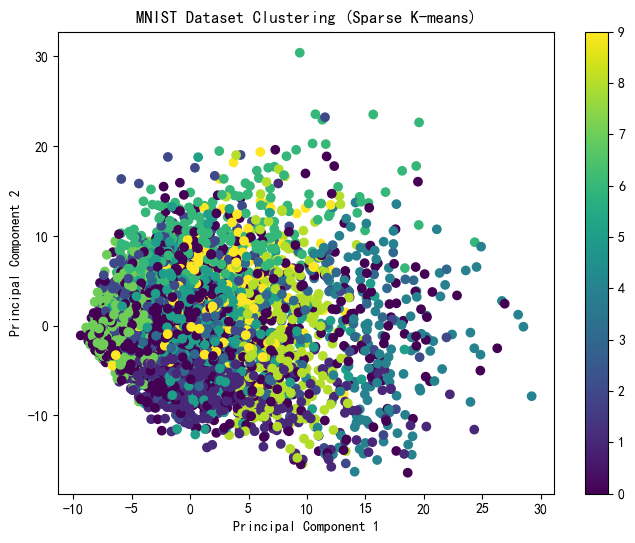

In [67]:
# --------------------------
# 对 MNIST 数据集进行聚类
# --------------------------
def cluster_mnist():
    print("\n===== MNIST 数据集 =====")
    # 加载数据
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    
    # 采样（因为MNIST数据集很大）
    np.random.seed(42)
    sample_indices = np.random.choice(len(X), size=5000, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # 标准化数据
    X_scaled = StandardScaler().fit_transform(X_sample)
    
    # 降维（加速聚类）
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_scaled)
    
    # 聚类
    labels = sparse_kmeans_clustering(X_pca, n_clusters=10, sparsity=0.5)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_pca, labels)
    
    # 可视化
    visualize_clustering(X_pca, labels, "MNIST Dataset Clustering (Sparse K-means)")

# 执行聚类
if __name__ == "__main__":
    cluster_mnist()

### 2.10.3 sparse kmeans  + 20 Newsgroups


===== 20 Newsgroups 数据集 =====
聚类评估结果:
Silhouette Score: -0.0091
Calinski-Harabasz Index: 69.2374


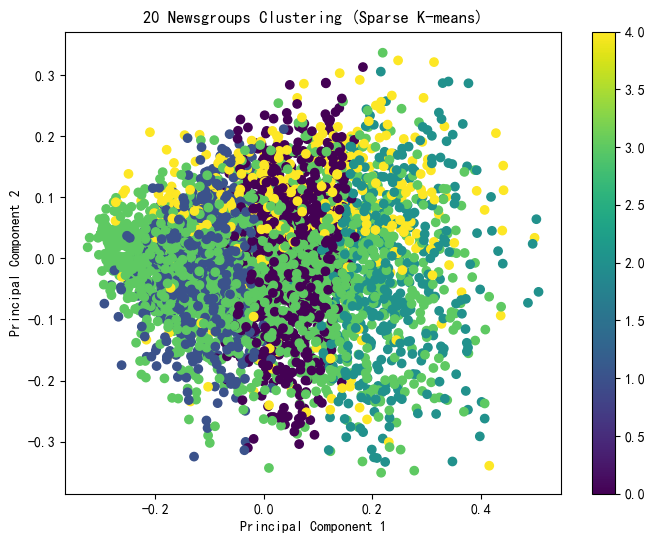

In [70]:
# --------------------------
# 对 20 Newsgroups 数据集进行聚类
# --------------------------
def cluster_20newsgroups():
    print("\n===== 20 Newsgroups 数据集 =====")
    # 加载数据
    categories = ['alt.atheism', 'sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.guns']
    newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
    X = newsgroups.data
    y = newsgroups.target
    
    # 特征提取
    vectorizer = TfidfVectorizer(max_features=2000)
    X_vectorized = vectorizer.fit_transform(X)
    
    # 降维（加速聚类）
    svd = TruncatedSVD(n_components=50)
    X_reduced = svd.fit_transform(X_vectorized)
    
    # 聚类
    labels = sparse_kmeans_clustering(X_reduced, n_clusters=5, sparsity=0.5)
    
    # 评估
    print("聚类评估结果:")
    evaluate_clustering(X_reduced, labels)
    
    # 可视化
    visualize_clustering(X_reduced, labels, "20 Newsgroups Clustering (Sparse K-means)")

# 执行聚类
if __name__ == "__main__":
    cluster_20newsgroups()

# 3. Comparison

## 3.1 Comparison between the datasets

下面给出的表格展示了三个数据集的类型、适用聚类类型和特点。

| 特征              | Iris 数据集       | MNIST 数据集       | 20 Newsgroups 数据集 |
|-------------------|------------------|-------------------|---------------------|
| **类型**          | 低维数据集       | 高维数据集        | 稀疏数据集         |
| **适用聚类类型**  | 平面聚类、层次聚类 | 高维聚类          | 稀疏聚类、文本聚类  |
| **特点**          | 数据集较小且特征清晰 | 样本数量大且特征维度高 | 文本数据通常是稀疏的 |

## 3.2 Comparison between the algorithms

### 3.2.1 K-Means
- **核心机制**：通过迭代优化簇中心和样本分配，将数据划分为预定义数量的簇。
- **适用场景**：适合低维数据，尤其是样本数量适中且簇数量已知的场景。
- **特点**：计算效率高，结果易于可视化，但需要用户事先指定簇的数量（K值）。

### 3.2.2 DBSCAN
- **核心机制**：基于密度的聚类算法，通过寻找密度相连的点来形成聚类。
- **适用场景**：适合处理噪声点较多的数据，尤其是簇形状不规则的场景。
- **特点**：能够自动确定簇的数量，适合未知簇数的场景，但参数设置（如eps和min_samples）对结果影响较大。

### 3.2.3 层次聚类
- **核心机制**：生成簇的层次结构，可以是“自底向上”（凝聚）或“自顶向下”（分裂）。
- **适用场景**：适合探索数据的层次关系，尤其是簇数量未知的场景。
- **特点**：能够生成簇的层次结构，适合可视化和分析数据的层次特性，但计算复杂度较高。

### 3.2.4 谱聚类
- **核心机制**：基于相似性图的拉普拉斯矩阵，通过优化图的划分来实现聚类。
- **适用场景**：适合处理非线性数据，尤其是簇形状复杂或数据分布不均匀的场景。
- **特点**：能够处理复杂的簇形状，但需要降维处理以提高计算效率。

### 3.2.5 高斯混合模型（GMM）
- **核心机制**：基于概率模型的优化，假设数据服从高斯分布，通过最大化似然估计来优化簇参数。
- **适用场景**：适合处理具有高斯分布的数据，尤其是簇形状为椭圆的场景。
- **特点**：能够提供概率解释，适合处理具有不确定性的数据，但计算复杂度较高。

### 3.2.6 Mean Shift
- **核心机制**：基于密度的优化，通过梯度上升法寻找密度峰值。
- **适用场景**：适合自动发现簇数量，尤其是簇形状不规则的场景。
- **特点**：无需事先指定簇数量，适合处理复杂密度分布的数据，但计算效率较低。

### 3.2.7 OPTICS
- **核心机制**：扩展了DBSCAN的功能，通过优化可达性距离来生成簇的层次结构。
- **适用场景**：适合处理复杂密度分布的数据，尤其是簇数量未知的场景。
- **特点**：能够生成簇的层次结构，适合探索数据的密度特性，但计算复杂度较高。

### 3.2.8 BIRCH
- **核心机制**：基于特征空间的压缩，通过构建CF树来高效处理大规模数据。
- **适用场景**：适合处理大规模数据，尤其是数据量较大且需要高效聚类的场景。
- **特点**：计算效率高，适合大规模数据，但对簇形状的适应性有限。

### 3.2.9 Affinity Propagation
- **核心机制**：基于相似性矩阵的优化，通过消息传递来优化簇中心。
- **适用场景**：适合处理复杂相似性关系的数据，尤其是簇数量未知的场景。
- **特点**：能够自动确定簇的数量，适合处理复杂相似性关系的数据，但计算复杂度较高。

### 3.2.10 稀疏K-Means
- **核心机制**：基于稀疏特征的优化，通过稀疏化处理来提高计算效率。
- **适用场景**：适合高维稀疏数据，尤其是特征数量较大的场景。
- **特点**：能够处理高维稀疏数据，适合特征选择和降维，但对稀疏性要求较高。

# 4. Summary

- **低维数据（Iris）**：K-Means、层次聚类、谱聚类等算法表现良好。
- **高维数据（MNIST）**：DBSCAN、谱聚类等算法表现较好，但计算效率较低。
- **高维稀疏数据（20 Newsgroups）**：DBSCAN、稀疏K-Means等算法表现较好，但需要调整参数以避免警告和提高性能。